# Churn Customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train= pd.read_csv('Churn_Customer_Train.csv')

In [3]:
df_train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [4]:
test= pd.read_csv('Churn_Customer_Test.csv')

In [5]:
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


# Train Dataset

In [6]:
df_train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


# EDA

(array([2043.,    0.,    0.,    0.,    0., 3076.,    0.,    0.,    0.,
        1531.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

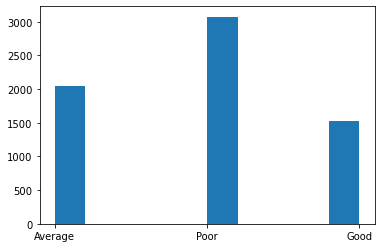

In [7]:
plt.hist(df_train['Credit_Category'])

(array([1847.,    0.,    0., 1573.,    0.,    0., 1345.,    0.,    0.,
        1885.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

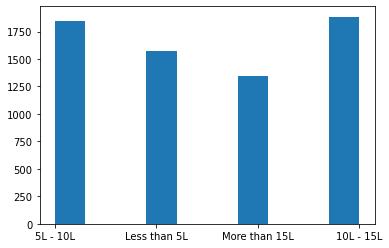

In [8]:
plt.hist(df_train['Income'])

(array([3038.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3612.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

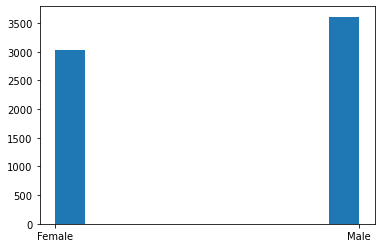

In [9]:
plt.hist(df_train['Gender'])

(array([5113.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1537.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

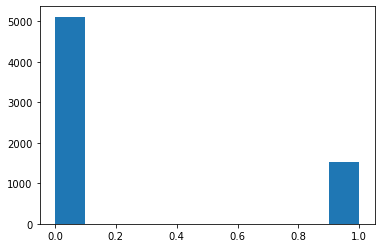

In [10]:
plt.hist(df_train['Is_Churn'])

# Feature Engineering

In [11]:
df_train.shape

(6650, 11)

In [12]:
df_train= df_train.drop('ID', axis=1)

In [13]:
df_train.isna().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [14]:
df_train.dtypes

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [15]:
df_train['Gender'].value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

In [16]:
df_train['Product_Holdings'].value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

In [17]:
df_train['Income'].value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [18]:

df1= df_train[(df_train['Product_Holdings']=='1')]
df2= df_train[(df_train['Product_Holdings']=='2')]
df3= df_train[(df_train['Product_Holdings']=='3+')]


In [19]:
df4= pd.concat([df1,df2], axis=0)

In [20]:
df3=df3.sample(round(df4.count()[0]/2), replace=True)

In [21]:
df_train= pd.concat([df4,df3], axis=0)

In [22]:
df_train= pd.get_dummies(columns=['Product_Holdings','Income','Gender'], data=df_train , drop_first=True)

In [23]:
df_train.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Credit_Category,Is_Churn,Product_Holdings_2,Product_Holdings_3+,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Gender_Male
0,36,563266.44,4,0,0,Average,1,0,0,1,0,0,0
1,53,875572.11,2,1,1,Poor,0,0,0,0,1,0,0
4,39,893146.23,1,1,1,Good,1,0,0,0,0,1,0
5,31,111026.79,4,1,0,Good,0,0,0,0,1,0,0
7,41,1587489.75,4,0,1,Poor,1,0,0,0,0,0,0


In [24]:
df_train['Credit_Category'].value_counts()

Poor       4267
Average    3017
Good       2289
Name: Credit_Category, dtype: int64

In [25]:
df_train['Credit_Category']= np.where(df_train['Credit_Category']=='Poor',0,df_train['Credit_Category'])
df_train['Credit_Category']= np.where(df_train['Credit_Category']=='Average',1,df_train['Credit_Category'])
df_train['Credit_Category']= np.where(df_train['Credit_Category']=='Good',2,df_train['Credit_Category'])
df_train['Credit_Category']=df_train['Credit_Category'].astype('int')

In [26]:
df_train['Credit_Category'].value_counts()

0    4267
1    3017
2    2289
Name: Credit_Category, dtype: int64

In [27]:
df_train.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Credit_Category,Is_Churn,Product_Holdings_2,Product_Holdings_3+,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Gender_Male
0,36,563266.44,4,0,0,1,1,0,0,1,0,0,0
1,53,875572.11,2,1,1,0,0,0,0,0,1,0,0
4,39,893146.23,1,1,1,2,1,0,0,0,0,1,0
5,31,111026.79,4,1,0,2,0,0,0,0,1,0,0
7,41,1587489.75,4,0,1,0,1,0,0,0,0,0,0


In [28]:
df_train.dtypes

Age                       int64
Balance                 float64
Vintage                   int64
Transaction_Status        int64
Credit_Card               int64
Credit_Category           int32
Is_Churn                  int64
Product_Holdings_2        uint8
Product_Holdings_3+       uint8
Income_5L - 10L           uint8
Income_Less than 5L       uint8
Income_More than 15L      uint8
Gender_Male               uint8
dtype: object

In [29]:
df_train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Credit_Category,Is_Churn,Product_Holdings_2,Product_Holdings_3+,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Gender_Male
count,9573.000000,9.573000e+03,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000
mean,40.907135,7.185161e+05,2.272433,0.508200,0.659981,0.793377,0.230022,0.332393,0.333333,0.284446,0.234932,0.210801,0.525854
std,9.542876,5.064717e+05,1.437204,0.499959,0.473740,0.801384,0.420869,0.471096,0.471429,0.451174,0.423978,0.407899,0.499357
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.821351e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,6.685852e+05,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,47.000000,1.043568e+06,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

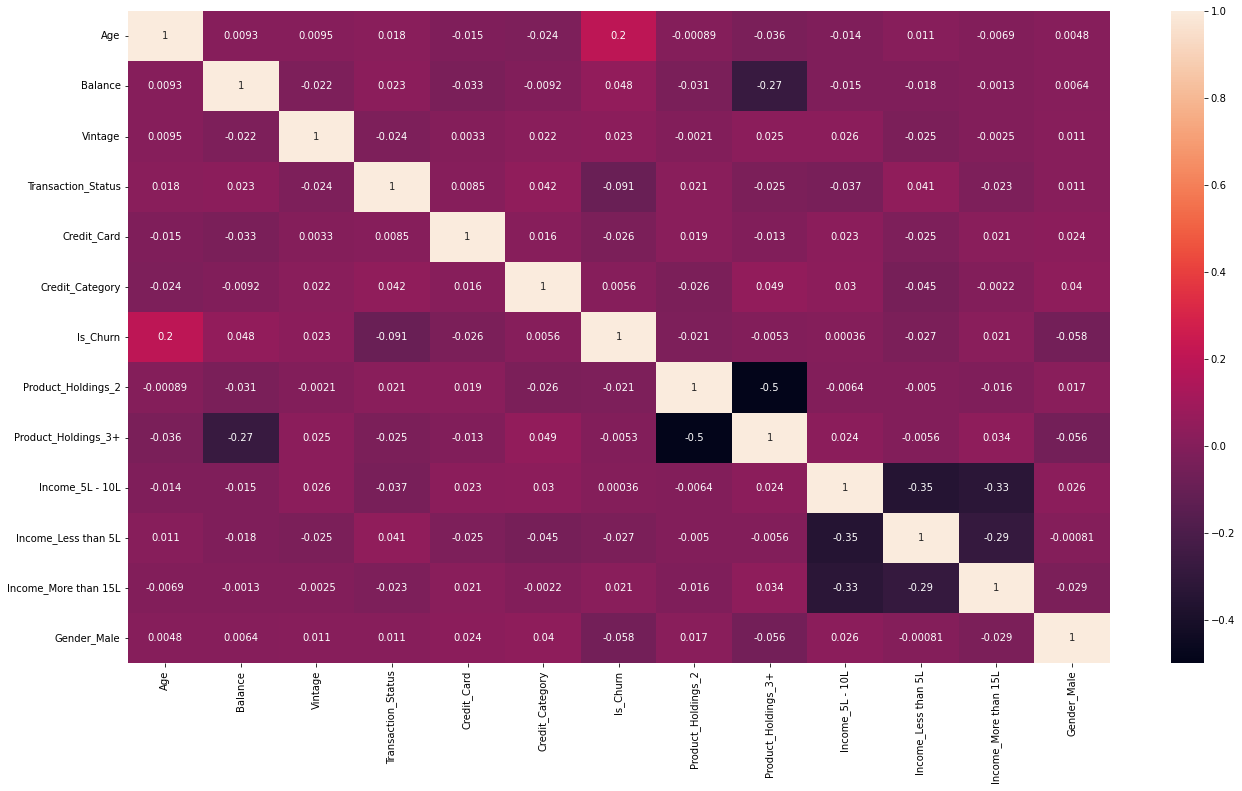

In [30]:
corr= df_train.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr, annot=True)

In [31]:
corr['Is_Churn'].sort_values(ascending=False)

Is_Churn                1.000000
Age                     0.203452
Balance                 0.047780
Vintage                 0.022816
Income_More than 15L    0.020579
Credit_Category         0.005570
Income_5L - 10L         0.000358
Product_Holdings_3+    -0.005265
Product_Holdings_2     -0.021040
Credit_Card            -0.025821
Income_Less than 5L    -0.026533
Gender_Male            -0.058126
Transaction_Status     -0.091384
Name: Is_Churn, dtype: float64

<AxesSubplot:>

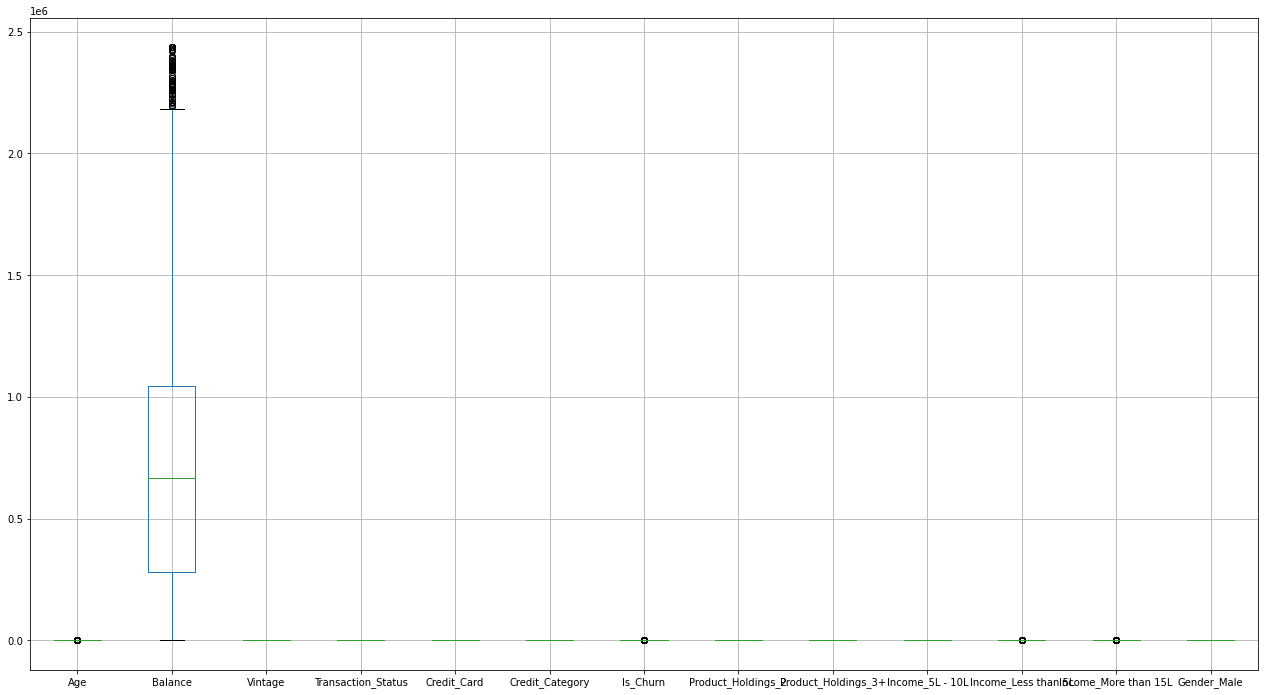

In [32]:
plt.figure(figsize=[22,12])
df_train.boxplot()

In [33]:
df_train.skew()

Age                     0.571124
Balance                 0.629940
Vintage                 0.021162
Transaction_Status     -0.032810
Credit_Card            -0.675538
Credit_Category         0.389206
Is_Churn                1.283225
Product_Holdings_2      0.711710
Product_Holdings_3+     0.707218
Income_5L - 10L         0.955726
Income_Less than 5L     1.250648
Income_More than 15L    1.418289
Gender_Male            -0.103571
dtype: float64

In [34]:
columns=['Age','Balance']
from sklearn.preprocessing import PowerTransformer
powertrans= PowerTransformer()
df_train[columns]= powertrans.fit_transform(df_train[columns])
df_train.skew()

Age                     0.004819
Balance                -0.174383
Vintage                 0.021162
Transaction_Status     -0.032810
Credit_Card            -0.675538
Credit_Category         0.389206
Is_Churn                1.283225
Product_Holdings_2      0.711710
Product_Holdings_3+     0.707218
Income_5L - 10L         0.955726
Income_Less than 5L     1.250648
Income_More than 15L    1.418289
Gender_Male            -0.103571
dtype: float64

<AxesSubplot:>

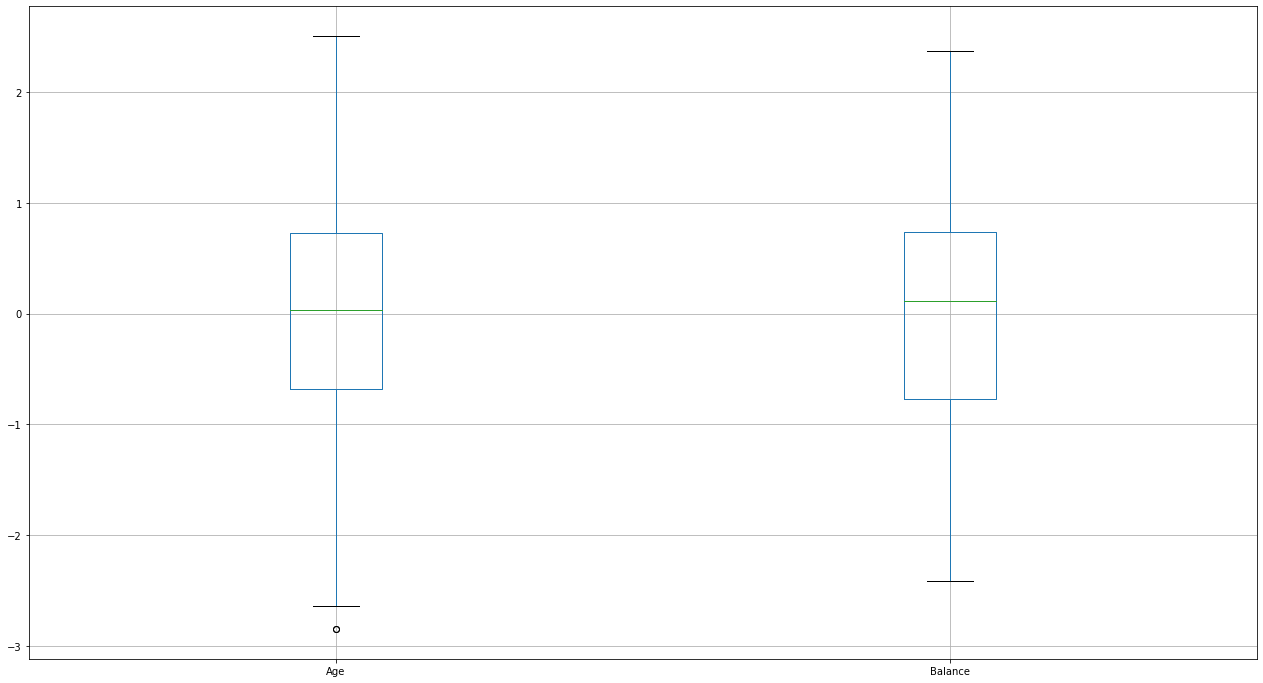

In [35]:
plt.figure(figsize=[22,12])
df_train[['Age','Balance']].boxplot()

In [36]:
col=['Age','Balance','Vintage','Credit_Category']
from sklearn.preprocessing import StandardScaler
stdscaler= StandardScaler()
df_train[col]= stdscaler.fit_transform(df_train[col])

# Train-Test Split

In [37]:
x= df_train.drop('Is_Churn',axis=1)
y= df_train['Is_Churn']

In [38]:
x.shape, y.shape, y.value_counts()

((9573, 12),
 (9573,),
 0    7371
 1    2202
 Name: Is_Churn, dtype: int64)

In [39]:

from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_new, y_new= smote.fit_resample(x,y)


In [40]:
x_new.shape, y_new.shape, y_new.value_counts()

((14742, 12),
 (14742,),
 1    7371
 0    7371
 Name: Is_Churn, dtype: int64)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_new, y_new, random_state=50, test_size=0.2, stratify=y_new)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11793, 12), (2949, 12), (11793,), (2949,))

In [43]:
y_train[y_train==1].shape, y_test[y_test==1].shape 

((5897,), (1474,))

In [44]:
y_train[y_train==0].shape, y_test[y_test==0].shape

((5896,), (1475,))

# ML Algorithms

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.6225839267548321
[[893 582]
 [531 943]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1475
           1       0.62      0.64      0.63      1474

    accuracy                           0.62      2949
   macro avg       0.62      0.62      0.62      2949
weighted avg       0.62      0.62      0.62      2949



In [47]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8192607663614785
[[1091  384]
 [ 149 1325]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1475
           1       0.78      0.90      0.83      1474

    accuracy                           0.82      2949
   macro avg       0.83      0.82      0.82      2949
weighted avg       0.83      0.82      0.82      2949



In [48]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8128179043743642
[[1190  285]
 [ 267 1207]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1475
           1       0.81      0.82      0.81      1474

    accuracy                           0.81      2949
   macro avg       0.81      0.81      0.81      2949
weighted avg       0.81      0.81      0.81      2949



In [49]:
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc= rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8735164462529671
[[1289  186]
 [ 187 1287]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1475
           1       0.87      0.87      0.87      1474

    accuracy                           0.87      2949
   macro avg       0.87      0.87      0.87      2949
weighted avg       0.87      0.87      0.87      2949



In [50]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
xgb= xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predxgb= xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test,predxgb))


[23:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8741946422516107
[[1356  119]
 [ 252 1222]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1475
           1       0.91      0.83      0.87      1474

    accuracy                           0.87      2949
   macro avg       0.88      0.87      0.87      2949
weighted avg       0.88      0.87      0.87      2949



In [52]:
lgb = lgb.LGBMClassifier()
lgb.fit(x_train, y_train)
predlgb= lgb.predict(x_test)
print(accuracy_score(y_test,predlgb))
print(confusion_matrix(y_test,predlgb))
print(classification_report(y_test,predlgb))

0.8606307222787386
[[1314  161]
 [ 250 1224]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1475
           1       0.88      0.83      0.86      1474

    accuracy                           0.86      2949
   macro avg       0.86      0.86      0.86      2949
weighted avg       0.86      0.86      0.86      2949



# Cross Validation Score

In [53]:
from sklearn.model_selection import StratifiedKFold
strat= StratifiedKFold(n_splits=10)
strat.get_n_splits(x_new,y_new)

for train_index, test_index in strat.split(x_new, y_new):
    x_train_new, x_test_new= x_new.iloc[train_index], x_new.iloc[test_index]
    y_train_new, y_test_new= y_new.iloc[train_index], y_new.iloc[test_index]
    rfc.fit(x_train_new, y_train_new)
    strat_predrfc= rfc.predict(x_test_new)
    print(accuracy_score(y_test_new,strat_predrfc))
    print(confusion_matrix(y_test_new,strat_predrfc))
    print(classification_report(y_test_new,strat_predrfc))

0.7545762711864407
[[598 139]
 [223 515]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       737
           1       0.79      0.70      0.74       738

    accuracy                           0.75      1475
   macro avg       0.76      0.75      0.75      1475
weighted avg       0.76      0.75      0.75      1475

0.5877966101694915
[[516 222]
 [386 351]]
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       738
           1       0.61      0.48      0.54       737

    accuracy                           0.59      1475
   macro avg       0.59      0.59      0.58      1475
weighted avg       0.59      0.59      0.58      1475

0.8344640434192673
[[495 242]
 [  2 735]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       737
           1       0.75      1.00      0.86       737

    accuracy                           0.83      1474
  

In [54]:
from sklearn.model_selection import StratifiedKFold
strat= StratifiedKFold(n_splits=10)
strat.get_n_splits(x_new,y_new)

for train_index, test_index in strat.split(x_new, y_new):
    x_train_new, x_test_new= x_new.iloc[train_index], x_new.iloc[test_index]
    y_train_new, y_test_new= y_new.iloc[train_index], y_new.iloc[test_index]
    xgb.fit(x_train_new, y_train_new)
    strat_predxgb= xgb.predict(x_test_new)
    print(accuracy_score(y_test_new,strat_predxgb))
    print(confusion_matrix(y_test_new,strat_predxgb))
    print(classification_report(y_test_new,strat_predxgb))

[23:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.5545762711864407
[[697  40]
 [617 121]]
              precision    recall  f1-score   support

           0       0.53      0.95      0.68       737
           1       0.75      0.16      0.27       738

    accuracy                           0.55      1475
   macro avg       0.64      0.55      0.47      1475
weighted avg       0.64      0.55      0.47      1475

[23:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.43796610169491523
[[588 150]
 [679  58]]
              precision    recall  f1-score   support

           0       0.46      0.80      0.59       738
           1       0.28      0.08      0.12       737

    accuracy                           0.44      1475
   macro avg       0.37      0.44      0.35      1475
weighted avg       0.37      0.44      0.35      1475

[23:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8724559023066486
[[549 188]
 [  0 737]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       737
           1       0.80      1.00      0.89       737

    accuracy                           0.87      1474
   macro avg       0.90      0.87      0.87      1474
weighted avg       0.90      0.87      0.87      1474

[23:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9260515603799185
[[642  95]
 [ 14 723]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       737
           1       0.88      0.98      0.93       737

    accuracy                           0.93      1474
   macro avg       0.93      0.93      0.93      1474
weighted avg       0.93      0.93      0.93      1474

[23:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9077340569877883
[[612 125]
 [ 11 726]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       737
           1       0.85      0.99      0.91       737

    accuracy                           0.91      1474
   macro avg       0.92      0.91      0.91      1474
weighted avg       0.92      0.91      0.91      1474

[23:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9063772048846676
[[610 127]
 [ 11 726]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       737
           1       0.85      0.99      0.91       737

    accuracy                           0.91      1474
   macro avg       0.92      0.91      0.91      1474
weighted avg       0.92      0.91      0.91      1474

[23:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9484396200814111
[[680  57]
 [ 19 718]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       737
           1       0.93      0.97      0.95       737

    accuracy                           0.95      1474
   macro avg       0.95      0.95      0.95      1474
weighted avg       0.95      0.95      0.95      1474

[23:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9823609226594301
[[737   0]
 [ 26 711]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       737
           1       1.00      0.96      0.98       737

    accuracy                           0.98      1474
   macro avg       0.98      0.98      0.98      1474
weighted avg       0.98      0.98      0.98      1474

[23:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9864314789687924
[[737   0]
 [ 20 717]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       737
           1       1.00      0.97      0.99       737

    accuracy                           0.99      1474
   macro avg       0.99      0.99      0.99      1474
weighted avg       0.99      0.99      0.99      1474

[23:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.989145183175034
[[737   0]
 [ 16 721]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       737
           1       1.00      0.98      0.99       737

    accuracy                           0.99      1474
   macro avg       0.99      0.99      0.99      1474
weighted avg       0.99      0.99      0.99      1474



In [55]:
from sklearn.model_selection import StratifiedKFold
strat= StratifiedKFold(n_splits=10)
strat.get_n_splits(x_new,y_new)

for train_index, test_index in strat.split(x_new, y_new):
    x_train_new, x_test_new= x_new.iloc[train_index], x_new.iloc[test_index]
    y_train_new, y_test_new= y_new.iloc[train_index], y_new.iloc[test_index]
    lgb.fit(x_train_new, y_train_new)
    strat_predlgb= lgb.predict(x_test_new)
    print(accuracy_score(y_test_new,strat_predlgb))
    print(confusion_matrix(y_test_new,strat_predlgb))
    print(classification_report(y_test_new,strat_predlgb))

0.5647457627118644
[[664  73]
 [569 169]]
              precision    recall  f1-score   support

           0       0.54      0.90      0.67       737
           1       0.70      0.23      0.34       738

    accuracy                           0.56      1475
   macro avg       0.62      0.56      0.51      1475
weighted avg       0.62      0.56      0.51      1475

0.39864406779661016
[[503 235]
 [652  85]]
              precision    recall  f1-score   support

           0       0.44      0.68      0.53       738
           1       0.27      0.12      0.16       737

    accuracy                           0.40      1475
   macro avg       0.35      0.40      0.35      1475
weighted avg       0.35      0.40      0.35      1475

0.8364993215739485
[[498 239]
 [  2 735]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       737
           1       0.75      1.00      0.86       737

    accuracy                           0.84      1474
 

# Hyper Parameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
parameter={'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': [None],
 'criterion': ['gini'],
 'max_depth': [40,45,50,55,60],
 'max_features': [3],
 'max_leaf_nodes': [2000],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [100],
 'n_jobs': [10],
 'oob_score': [False],
 'random_state': [200,300,500,600],
 'verbose': [0],
 'warm_start': [False]}
gcv=GridSearchCV(rfc,parameter,cv=10)
gcv.fit(x_train,y_train)
gcv.best_params_ 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 3,
 'max_leaf_nodes': 2000,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 10,
 'oob_score': False,
 'random_state': 500,
 'verbose': 0,
 'warm_start': False}

In [57]:
predgcv=gcv.best_estimator_.predict(x_test)
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))

0.8691081722617836
[[1263  212]
 [ 174 1300]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1475
           1       0.86      0.88      0.87      1474

    accuracy                           0.87      2949
   macro avg       0.87      0.87      0.87      2949
weighted avg       0.87      0.87      0.87      2949



(array([1476.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1473.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

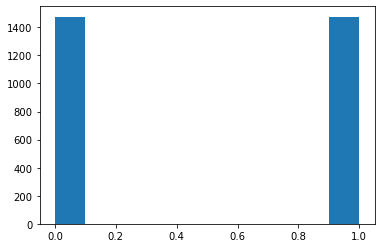

In [58]:
plt.hist(predrfc)

# Test Dataset

In [59]:
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [60]:
test.shape

(2851, 10)

In [61]:
df_test= test.drop('ID', axis=1)

In [62]:
df_test.isna().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [63]:
df_test.dtypes

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
dtype: object

In [64]:
df_test['Gender'].value_counts()

Male      1545
Female    1306
Name: Gender, dtype: int64

In [65]:
df_test['Product_Holdings'].value_counts()

2     1359
1     1342
3+     150
Name: Product_Holdings, dtype: int64

In [66]:
df_test['Income'].value_counts()

10L - 15L        844
5L - 10L         794
Less than 5L     648
More than 15L    565
Name: Income, dtype: int64

In [67]:
df_test= pd.get_dummies(columns=['Product_Holdings','Income','Gender'], data=df_test , drop_first=True)

In [68]:
df_test['Credit_Category'].value_counts()

Poor       1270
Average     866
Good        715
Name: Credit_Category, dtype: int64

In [69]:
df_test['Credit_Category']= np.where(df_test['Credit_Category']=='Poor',0,df_test['Credit_Category'])
df_test['Credit_Category']= np.where(df_test['Credit_Category']=='Average',1,df_test['Credit_Category'])
df_test['Credit_Category']= np.where(df_test['Credit_Category']=='Good',2,df_test['Credit_Category'])
df_test['Credit_Category']=df_test['Credit_Category'].astype('int')

In [70]:
df_test['Credit_Category'].value_counts()

0    1270
1     866
2     715
Name: Credit_Category, dtype: int64

In [71]:
df_test.dtypes

Age                       int64
Balance                 float64
Vintage                   int64
Transaction_Status        int64
Credit_Card               int64
Credit_Category           int32
Product_Holdings_2        uint8
Product_Holdings_3+       uint8
Income_5L - 10L           uint8
Income_Less than 5L       uint8
Income_More than 15L      uint8
Gender_Male               uint8
dtype: object

In [72]:
df_test.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Credit_Category,Product_Holdings_2,Product_Holdings_3+,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Gender_Male
0,50,1008636.39,2,1,1,1,1,0,0,0,1,0
1,36,341460.72,2,0,1,1,1,0,1,0,0,1
2,25,439460.10,0,0,1,2,1,0,0,0,0,0
3,41,28581.93,0,1,1,0,1,0,0,1,0,1
4,48,1104540.03,2,1,0,2,0,1,0,0,1,1


In [73]:
df_test.skew()

Age                     0.556185
Balance                 0.519035
Vintage                 0.038753
Transaction_Status     -0.027376
Credit_Card            -0.718114
Credit_Category         0.369339
Product_Holdings_2      0.093451
Product_Holdings_3+     4.009878
Income_5L - 10L         0.988791
Income_Less than 5L     1.302160
Income_More than 15L    1.515120
Gender_Male            -0.168341
dtype: float64

In [74]:
columns=['Age','Balance']
df_test[columns]= powertrans.transform(df_test[columns])
df_test.skew()

Age                     0.000797
Balance                -0.297727
Vintage                 0.038753
Transaction_Status     -0.027376
Credit_Card            -0.718114
Credit_Category         0.369339
Product_Holdings_2      0.093451
Product_Holdings_3+     4.009878
Income_5L - 10L         0.988791
Income_Less than 5L     1.302160
Income_More than 15L    1.515120
Gender_Male            -0.168341
dtype: float64

In [75]:
col=['Age','Balance','Vintage','Credit_Category']
df_test[col]= stdscaler.transform(df_test[col])

In [76]:
pred_test=rfc.predict(df_test)

(array([2327.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         524.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

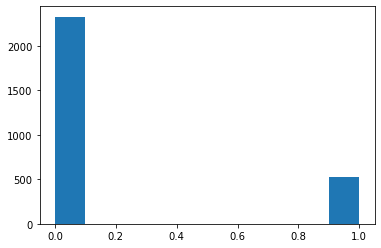

In [77]:
plt.hist(pred_test)

In [78]:
final_df= pd.DataFrame(pred_test, columns=['Predicted values'])

In [79]:
final_df['ID']=test['ID']

In [80]:
final_df['Is_Churn']= final_df['Predicted values']

In [81]:
final_df= final_df.drop('Predicted values',axis=1)

In [82]:
final_df.head()

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0


In [83]:
final_df.to_csv('Churn Customer.csv', index=False)